In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
resize=224

In [3]:


from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D



In [4]:

train_dir='/Users/liangyu/Documents/hackOH/data/train'
test_dir='/Users/liangyu/Documents/hackOH/data/test'
train_flow=ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=64,class_mode='categorical')
test_flow=ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=64,class_mode='categorical')
print(train_flow.class_indices)


Found 636 images belonging to 3 classes.
Found 116 images belonging to 3 classes.
{'desposed': 0, 'inservice': 1, 'maintance': 2}


In [5]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
base_model = VGG16(weights='imagenet', include_top=False, 
                   input_shape=(resize, resize, 3), classes = 3)
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],)

his=model.fit_generator(train_flow,
                        steps_per_epoch=20,
                        epochs=20,
                        validation_data=test_flow)




Epoch 1/20
20/20 [==============================] - 414s 21s/step - loss: 0.9640 - accuracy: 0.5456 - val_loss: 0.7244 - val_accuracy: 0.8362
Epoch 2/20
20/20 [==============================] - 401s 20s/step - loss: 0.6642 - accuracy: 0.7421 - val_loss: 0.6047 - val_accuracy: 0.8448
Epoch 3/20
20/20 [==============================] - 396s 20s/step - loss: 0.5457 - accuracy: 0.7995 - val_loss: 0.4331 - val_accuracy: 0.8534
Epoch 4/20
20/20 [==============================] - 393s 20s/step - loss: 0.4732 - accuracy: 0.8247 - val_loss: 0.4259 - val_accuracy: 0.8707
Epoch 5/20
20/20 [==============================] - 386s 19s/step - loss: 0.4121 - accuracy: 0.8608 - val_loss: 0.3716 - val_accuracy: 0.8707
Epoch 6/20
20/20 [==============================] - 386s 19s/step - loss: 0.3768 - accuracy: 0.8608 - val_loss: 0.3354 - val_accuracy: 0.8707
Epoch 7/20
20/20 [==============================] - 392s 20s/step - loss: 0.3282 - accuracy: 0.8994 - val_loss: 0.3444 - val_accuracy: 0.8793
Epoch 

In [6]:
model.save('/Users/liangyu/Documents/hackOH/model.h5')


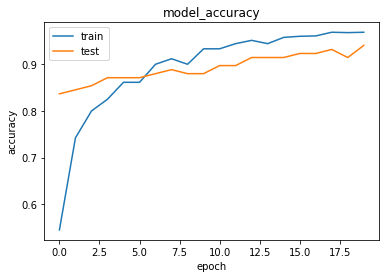

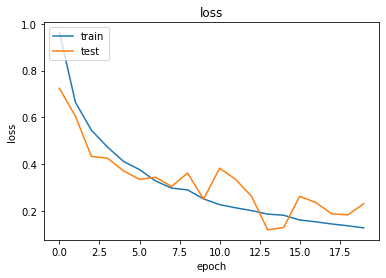

In [7]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   